In [127]:
#Q.1 Delivery_time -> Predict delivery time using sorting time 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
from scipy import stats

In [34]:
data=pd.read_csv("E:\Susmita_Backup\Data Science Course\Data Science Assignment\Simple Linear Regression\delivery_time.csv")

In [35]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [36]:
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [37]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

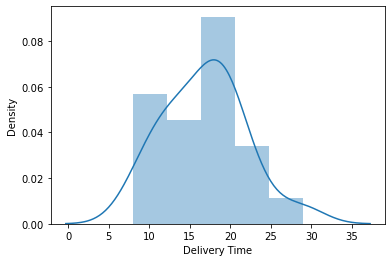

In [38]:
sns.distplot(data['Delivery Time'])

C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

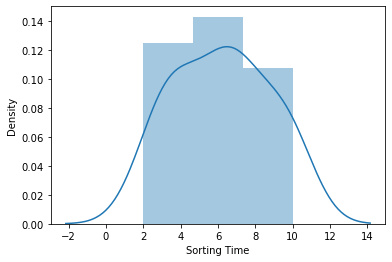

In [39]:
sns.distplot(data['Sorting Time'])

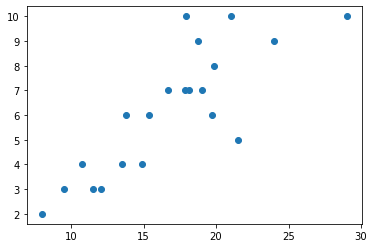

In [40]:
plt.scatter(data['Delivery Time'],data['Sorting Time'])

In [49]:
data=data.rename({'Delivery Time':'DeliveryTime','Sorting Time':'SortingTime'}, axis=1)

In [50]:
import statsmodels.formula.api as smf
model = smf.ols('DeliveryTime~SortingTime',data=data).fit()

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

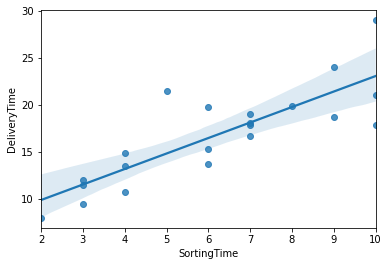

In [52]:
sns.regplot(x="SortingTime", y="DeliveryTime", data=data)

In [54]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [58]:
print(model.tvalues,'\n',model.pvalues)

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [59]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

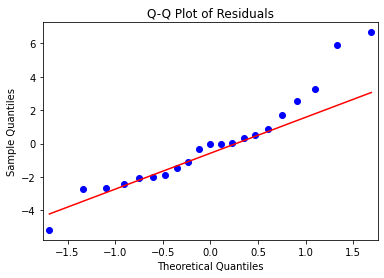

In [64]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [78]:
#Sqrt Transformations
data1=pd.merge(np.sqrt(data['SortingTime']).reset_index(),data['DeliveryTime'].reset_index())
data1.drop('index', axis=1)

,SortingTime,DeliveryTime
0,3.162278,21.00
1,2.000000,13.50
2,2.449490,19.75
3,3.000000,24.00
4,3.162278,29.00
5,2.449490,15.35
6,2.645751,19.00
7,1.732051,9.50
8,3.162278,17.90
9,3.000000,18.75


In [79]:
model1=smf.ols('DeliveryTime~SortingTime', data=data1).fit()

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

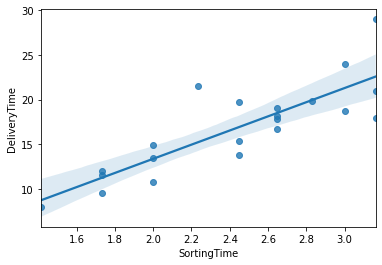

In [80]:
sns.regplot(x='SortingTime',y='DeliveryTime', data=data1)

In [81]:
model1.params

Intercept     -2.518837
SortingTime    7.936591
dtype: float64

In [83]:
print(model1.tvalues,'\n',model1.pvalues)

Intercept     -0.840911
SortingTime    6.592434
dtype: float64 
 Intercept      0.410857
SortingTime    0.000003
dtype: float64


In [85]:
(model1.rsquared,model1.rsquared_adj)

(0.695806227630867, 0.6797960290851232)

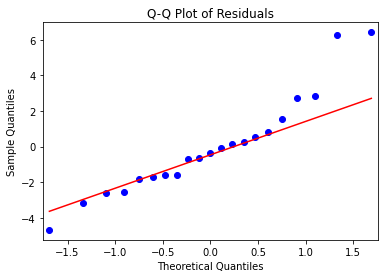

In [87]:
qqplot1=sm.qqplot(model1.resid,line='q')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [110]:
#Data Prediction
y=model1.predict(data1['SortingTime'])
y

0     22.578867
1     13.354345
2     16.921761
3     21.290936
4     22.578867
5     16.921761
6     18.479409
7     11.227742
8     22.578867
9     21.290936
10    19.929232
11    13.354345
12    18.479409
13    11.227742
14    11.227742
15    13.354345
16    16.921761
17    18.479409
18     8.705198
19    18.479409
20    15.227920
dtype: float64

In [114]:
data2=pd.merge(data.reset_index(),y.reset_index())
data2=data2.drop('index',axis=1)
data2.columns=['DeliveryTime','SortingTime','Predicted DeliveryTime']
print(data2)

    DeliveryTime  SortingTime  Predicted DeliveryTime
0          21.00           10               22.578867
1          13.50            4               13.354345
2          19.75            6               16.921761
3          24.00            9               21.290936
4          29.00           10               22.578867
5          15.35            6               16.921761
6          19.00            7               18.479409
7           9.50            3               11.227742
8          17.90           10               22.578867
9          18.75            9               21.290936
10         19.83            8               19.929232
11         10.75            4               13.354345
12         16.68            7               18.479409
13         11.50            3               11.227742
14         12.03            3               11.227742
15         14.88            4               13.354345
16         13.75            6               16.921761
17         18.11            

In [120]:
newdata=pd.Series([4,6,8,10])
data3=pd.DataFrame(newdata,columns=['SortingTime'])
data3

,SortingTime
0,4
1,6
2,8
3,10


In [121]:
model.predict(data3)

0    13.178814
1    16.476853
2    19.774893
3    23.072933
dtype: float64

In [123]:
model1.predict(data3)

0    29.227526
1    45.100708
2    60.973889
3    76.847071
dtype: float64

In [ ]:
#Q.2 Salary_hike -> Build a prediction model for Salary_hike

In [128]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import numpy as np

In [129]:
df=pd.read_csv("E:\Susmita_Backup\Data Science Course\Data Science Assignment\Simple Linear Regression\Salary_data.csv")
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [130]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

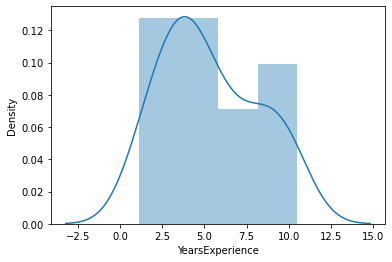

In [140]:
sns.distplot(df['YearsExperience'])

C:\Users\Susmita Ranpise\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

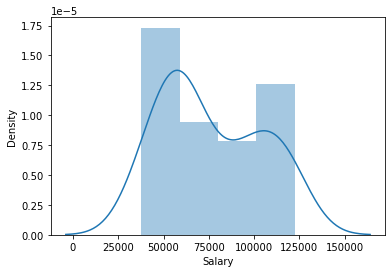

In [141]:
sns.distplot(df['Salary'])

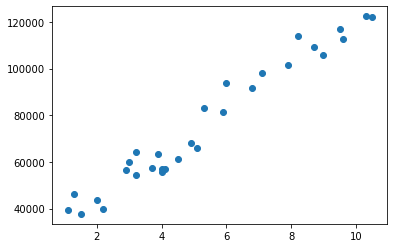

In [144]:
plt.scatter(df['YearsExperience'],df['Salary'])

In [147]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [159]:
import statsmodels.formula.api as smf
model=smf.ols('Salary~YearsExperience', data=df).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

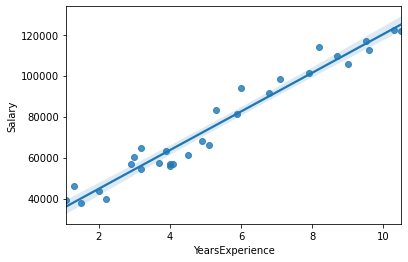

In [149]:
sns.regplot(x='YearsExperience',y='Salary',data=df)

In [160]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [161]:
print(model.tvalues,'\n', model2.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [162]:
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

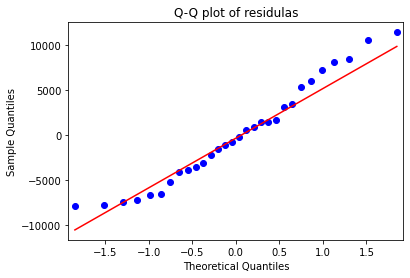

In [164]:
import statsmodels.api as sm
sm.qqplot(model.resid, line='q')
plt.title('Q-Q plot of residulas')
plt.show()

In [171]:
#Predict Salary
y1=model.predict(df['YearsExperience'])
df2=pd.merge(df.reset_index(),y1.reset_index())
df2=df2.drop('index', axis=1)
df2.columns=['YearsExp','Salary','Predicted Salary']
df2

,YearsExp,Salary,Predicted Salary
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [176]:
newdata1=pd.Series([2.1,3.5,5.7,7.3,10.6])
df3=pd.DataFrame(newdata1, columns=['YearsExperience'])
df3

,YearsExperience
0,2.1
1,3.5
2,5.7
3,7.3
4,10.6


In [177]:
y2=model.predict(df3)
print(y2)

0     45637.121074
1     58867.068324
2     79656.985431
3     94776.925145
4    125961.800806
dtype: float64
